In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
data_path = '../parsed/parsed.csv'

In [3]:
# TODO don't forget to remove limit
df = pd.read_csv(data_path, parse_dates=['dtm'], converters={"tags": literal_eval}, nrows=1000)
# let's see how df looks and get some basic info
print (df)

          id  data-story-long  rating meta-rating  author_id  comments  \
0    7337284             True  7727.0    7884:157    1002684       479   
1    7337282             True    15.0       25:10    2008181         6   
2    7337254             True    28.0       39:11    2522374         2   
3    7337245             True     6.0       18:12    3073815        13   
4    7337246             True    21.0        28:7    3156206         8   
..       ...              ...     ...         ...        ...       ...   
995  6915487             True    -1.0         7:8    1731356        10   
996  6915485             True  4954.0    5066:112    2747652       238   
997  7814908             True    20.0        21:1    1633889        14   
998  7814895             True   207.0      225:18    1002684        17   
999  7814891             True     5.0         8:3    2248623         1   

                          dtm  views  saves       author_name  \
0   2020-04-02 15:12:18+03:00    NaN    181  k

In [4]:
df.count()

id                 1000
data-story-long    1000
rating              989
meta-rating        1000
author_id          1000
comments           1000
dtm                1000
views                 0
saves              1000
author_name        1000
title              1000
tags               1000
text               1000
dtype: int64

In [5]:
# Well, there are no views in dataset, pikubu doesn't return it within html response when using search. 
# Instead it shows something like "Loading views count...", guess this loading is being made by js
# Let's drop this column
df.drop(columns=["views"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype                                
---  ------           --------------  -----                                
 0   id               1000 non-null   int64                                
 1   data-story-long  1000 non-null   bool                                 
 2   rating           989 non-null    float64                              
 3   meta-rating      1000 non-null   object                               
 4   author_id        1000 non-null   int64                                
 5   comments         1000 non-null   int64                                
 6   dtm              1000 non-null   datetime64[ns, pytz.FixedOffset(180)]
 7   saves            1000 non-null   int64                                
 8   author_name      1000 non-null   object                               
 9   title            1000 non-null   object              

array([[<AxesSubplot:title={'center':'dtm'}>]], dtype=object)

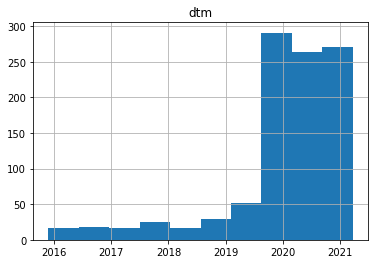

In [6]:
# let's see how posts are distributed by time
df.hist("dtm")

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

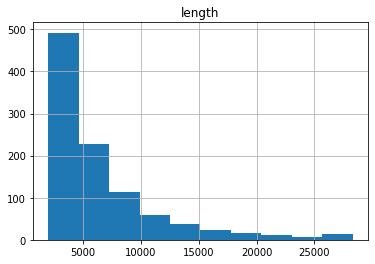

In [7]:
# and by lengths
df["length"] = np.array(df["text"].apply(len))
df.hist("length")

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

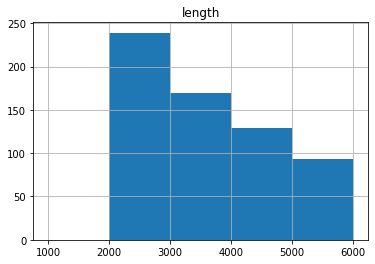

In [8]:
df.hist("length", bins=[1000, 2000, 3000, 4000, 5000, 6000])  # double check that there are no texts below 2000 characters

In [9]:
# let's grab tags frequency and make hist out of them
df_tags = pd.DataFrame([tag.lower() for tag_list in df["tags"] for tag in tag_list])
tags_counts = df_tags.value_counts()

figsize = 20, 5  # declare this for further hists

len(tags_counts)  # uniue tags

2470

<AxesSubplot:xlabel='0'>

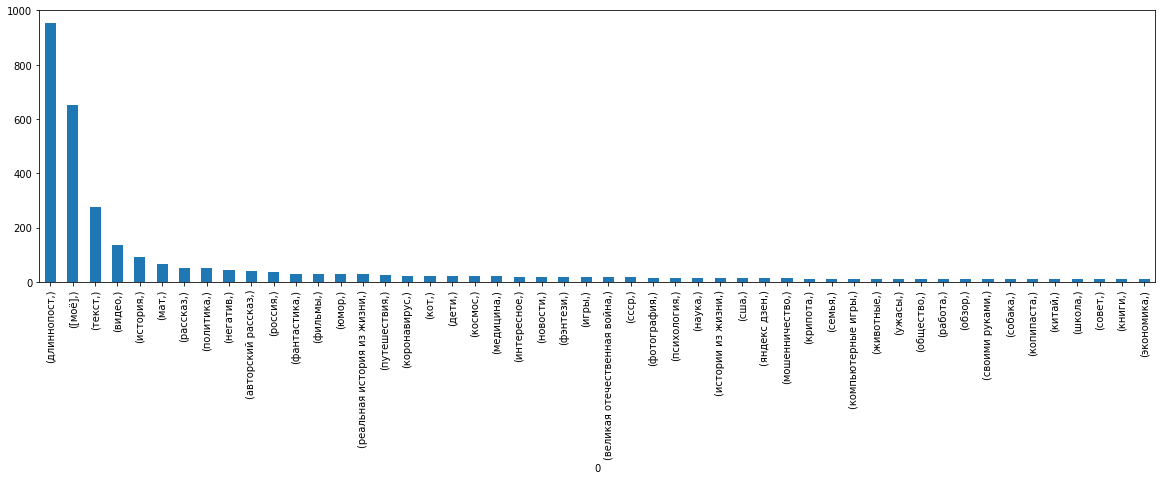

In [10]:
tags_counts[:50].plot(kind='bar', figsize=figsize)

<AxesSubplot:xlabel='0'>

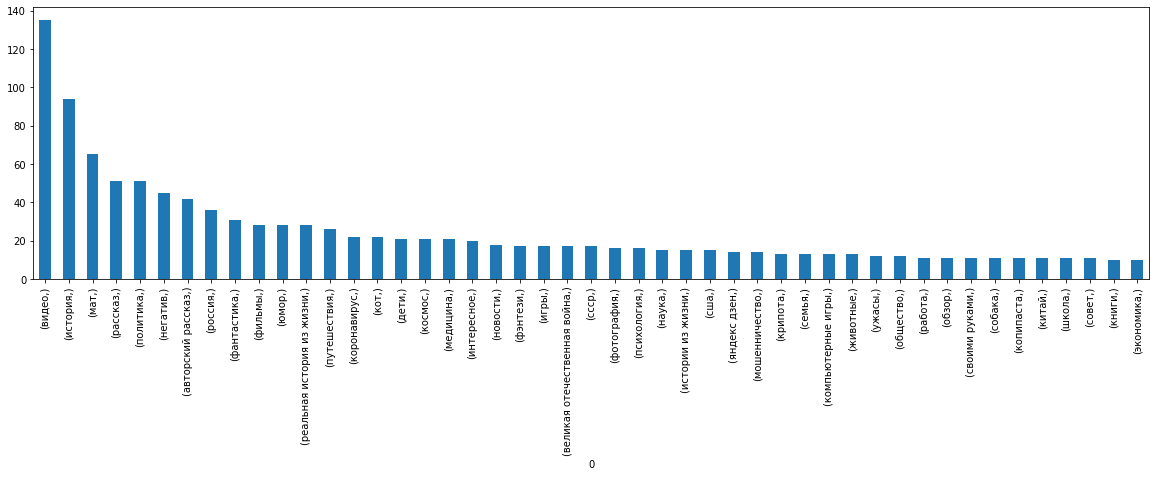

In [11]:
tags_counts[3:50].plot(kind='bar', figsize=figsize)  # now let's take a closer look at the same hist but without first 3 tags

<AxesSubplot:xlabel='0'>

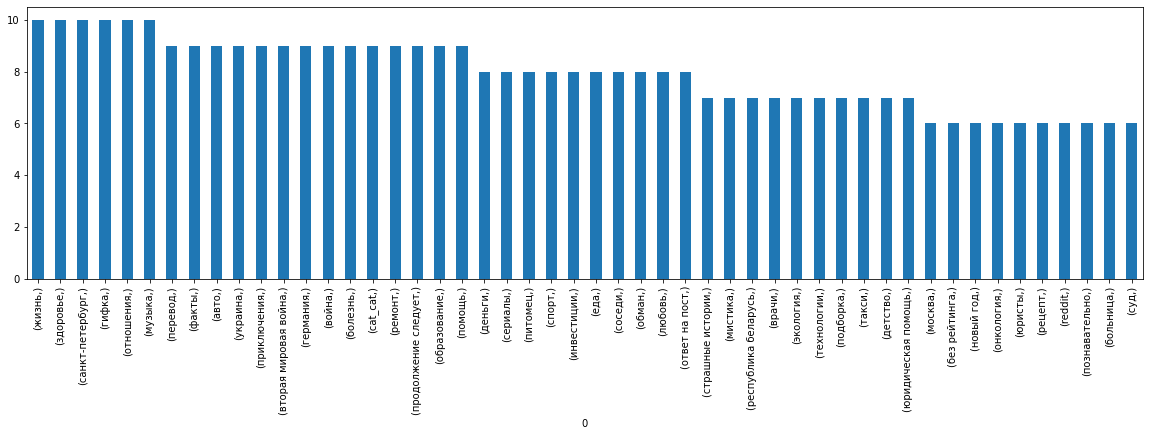

In [12]:
tags_counts[50:100].plot(kind='bar', figsize=figsize)